# Test Default Model

In [1]:
from darkflow.net.build import TFNet

### Build

In [30]:
options = {"model": "cfg/tiny-yolo-voc.cfg", 
           "load": "bin/tiny-yolo-voc.weights", 
           "threshold": 0.5, 
           "gpu": 1.0}

tfnet = TFNet(options)

Parsing ./cfg/tiny-yolo-voc.cfg
Parsing cfg/tiny-yolo-voc.cfg
Loading bin/tiny-yolo-voc.weights ...
Successfully identified 63471556 bytes
Finished in 0.7780637741088867s
Model has a VOC model name, loading VOC labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 1

In [45]:
options2 = {"model": "cfg/tiny-yolo-voc.cfg", 
            "load": "bin/tiny-yolo-voc.weights", 
            "train":
            "dataset":
            "imgdir":
            "labels":
            "summary":
            "annotation":
            "threshold": 0.5, 
            "gpu": 1.0}

# tfnet2 = TFNet(options2)

### Predict

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [32]:
original_img = cv2.imread('sample_img/sample_horses.jpg')
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

In [33]:
results = tfnet.return_predict(original_img)
results

[{'label': 'cow',
  'confidence': 0.5709016,
  'topleft': {'x': 236, 'y': 186},
  'bottomright': {'x': 418, 'y': 346}},
 {'label': 'cow',
  'confidence': 0.69086856,
  'topleft': {'x': 414, 'y': 215},
  'bottomright': {'x': 605, 'y': 344}},
 {'label': 'horse',
  'confidence': 0.6783147,
  'topleft': {'x': 10, 'y': 196},
  'bottomright': {'x': 405, 'y': 388}}]

In [34]:
def boxing(original_img, predictions):
    newImage = np.copy(original_img)

    for result in predictions:
        top_x = result['topleft']['x']
        top_y = result['topleft']['y']

        btm_x = result['bottomright']['x']
        btm_y = result['bottomright']['y']

        confidence = result['confidence']
        label = result['label'] + " " + str(round(confidence, 3))

        if confidence > 0.3:
            newImage = cv2.rectangle(newImage, (top_x, top_y), (btm_x, btm_y), (255,0,0), 3)
            newImage = cv2.putText(newImage, label, (top_x, top_y-5), cv2.FONT_HERSHEY_COMPLEX_SMALL , 0.8, (0, 230, 0), 1, cv2.LINE_AA)
            
    return newImage

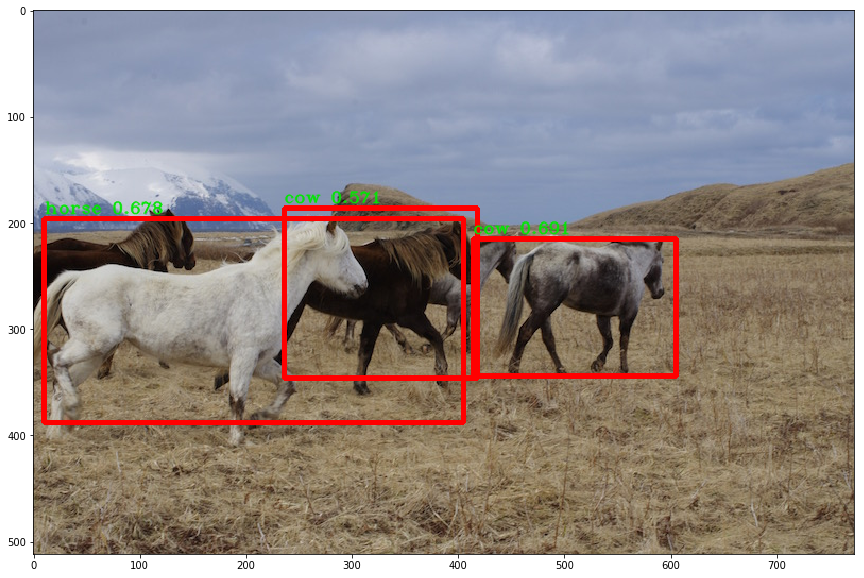

In [35]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(boxing(original_img, results))

In [47]:
cap = cv2.VideoCapture('./sample_video/crowd.mp4')
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)   
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT) 

fourcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter('./sample_video/output.avi',fourcc, 20.0, (int(width), int(height)))

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    if ret == True:
        frame = np.asarray(frame)
        results = tfnet.return_predict(frame)

        new_frame = boxing(frame, results)

        # Display the resulting frame
        out.write(new_frame)
        cv2.imshow('frame',new_frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# When everything done, release the capture
cap.release()
out.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [36]:
def showYoloResult(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    res = tfnet.return_predict(img)
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(boxing(img, res))
    return res

[]

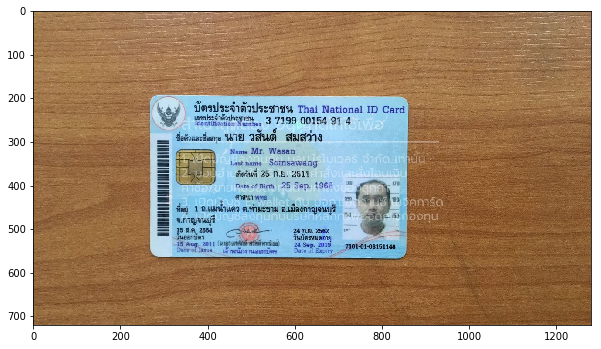

In [37]:
showYoloResult('train/Images/1.jpg')

[]

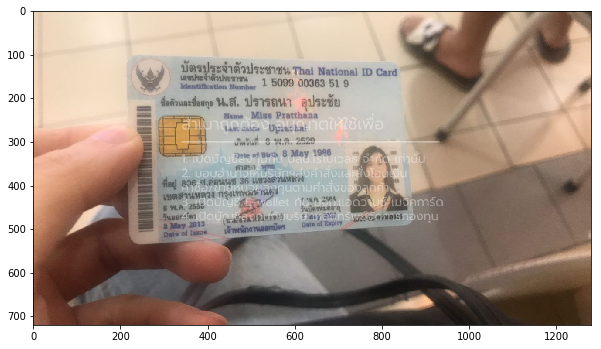

In [38]:
showYoloResult('train/Images/3.jpg')

[]

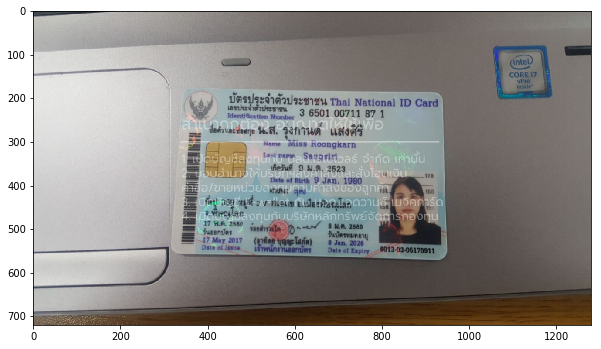

In [39]:
showYoloResult('train/Images/4.jpg')

[]

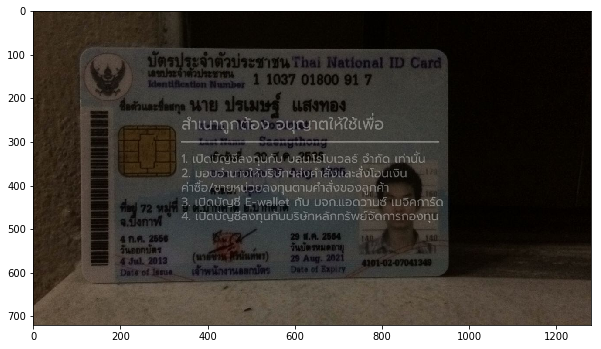

In [40]:
showYoloResult('train/Images/5.jpg')

[]

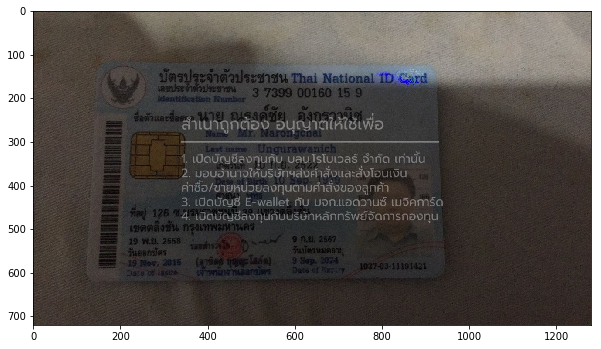

In [41]:
showYoloResult('train/Images/6.jpg')

[{'label': 'person',
  'confidence': 0.5351946,
  'topleft': {'x': 0, 'y': 31},
  'bottomright': {'x': 719, 'y': 792}}]

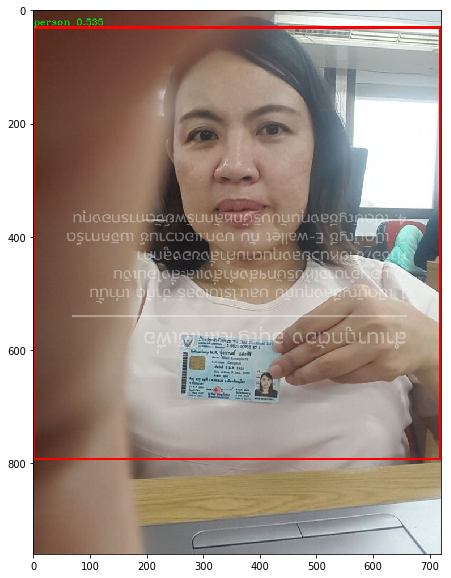

In [42]:
showYoloResult('train/Images/7.jpg')

[]

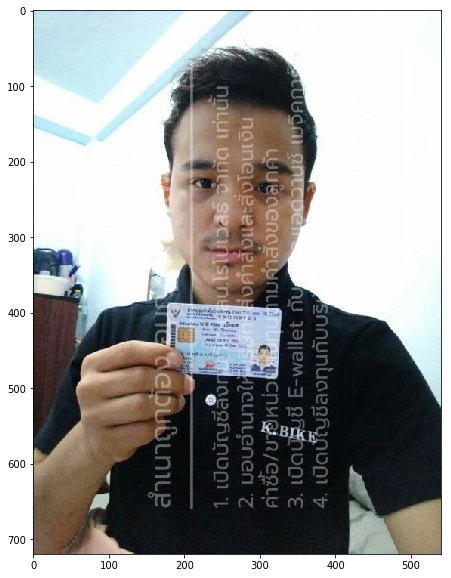

In [44]:
showYoloResult('train/Images/8.jpg')